## Polynomial Regression

In [ ]:
#  Polynomial Regression is a special case of Linear Regression where 
#  we fit the polynomial equation on the data with a curvilinear 
#  relationship between the dependent and independent variables.


#  If your data points clearly will not fit a linear regression 
#  (a straight line through all data points), 
#  it might be ideal for polynomial regression.

#  Polynomial regression, like linear regression, 
#  uses the relationship between the variables x and y to 
#  find the best way to draw a line through the data points.

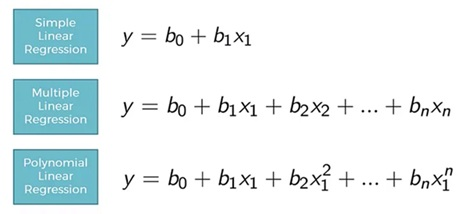


In [ ]:
#  Where
#  y is the dependent variable.
#  x is the independent variable.
#  β0,β1,…,βn are the coefficients of the polynomial terms.
#  n is the degree of the polynomial.

### Import library and Dataset

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv(r'C:\Users\Admin\Datasets\Position_Salaries.csv')

In [5]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [11]:
dataset.shape

(10, 3)

In [10]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
#Position column is diffrent thats not variable so we are not taking it(Not to add in split)

### Split Features (x) and Labels (y)

In [19]:
x = dataset.iloc[: , 1:2].values
y = dataset.iloc[: , 2].values

In [20]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [21]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

### Visualized the Model by Scatter plot
#### Now want to see what kind of data we have

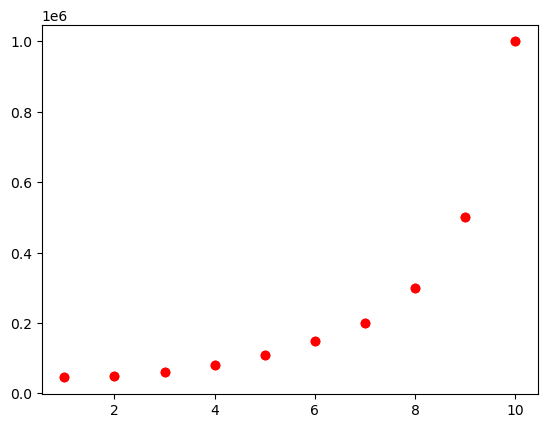

In [23]:
plt.scatter(x,y, color='red')
plt.show()

In [24]:
# These red dots are not in straight line, they are making curved
# If I fit i line here it will not get correct prediction

In [26]:
# Now we will test it into two ways:

# First with Linear Regression
# Second with Polynomial Regression
# Then we will see which is the line best fit with it

#### First we will train Linear Regression here

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lin_reg1 = LinearRegression()

In [29]:
#Model fit step
lin_reg1.fit(x , y)  #It will fit Linear Model for these two variable

LinearRegression()

In [ ]:
# To see how line fit here, we need to visualize

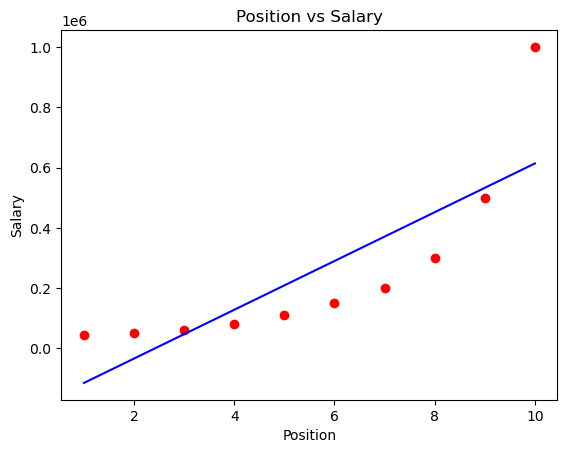

In [33]:
plt.scatter( x , y, color ='red')
# for predict, we use 'x' here becuase we do not divide our dataset from train or test
# we are doing this for the explanation
plt.plot(x , lin_reg1.predict(x) , color = 'blue')
plt.title('Position vs Salary')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [35]:
# as we see above grph, do not give correct linear line as red dots are showing curve (polynomial)

#### First we will apply Polynomial Regression here

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly_reg = PolynomialFeatures(degree=4)

# degree sets the degree of our polynomial function. degree=4 means that we want to work with a 4th degree polynomial:

# y = ß0 + ß1x^1 + ß2x^2 + ß3x^3 + ß4x^4


In [57]:
x_poly = poly_reg.fit_transform(x)

In [58]:
x_poly  # be low we will have x, x^1, x^2, x^3 and x^4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [59]:
# Our feature matric has made for our polynomial regression

In [60]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)

LinearRegression()

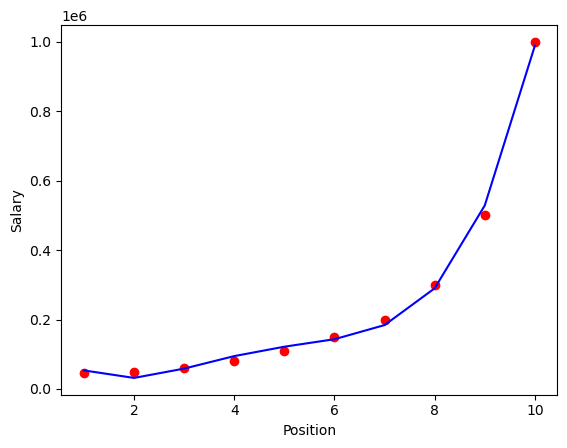

In [47]:
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg2.predict(x_poly), color='blue')
plt.show()

#### Find Random Point for Predict for Linear

In [63]:
print(lin_reg1.predict([[6.5]]))

[330378.78787879]


#### Find Random Point for Predict for Polynomial

In [64]:
print(lin_reg2.predict(poly_reg.fit_transform([[6.5]])))

[158862.45265153]


In [65]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [66]:
# so polynomial regression fit well for our model as compared to linear

In [68]:
# if we play around with degree like this degree=4 
# our prediction will be more better if we keep different degree to check how much accuracy is improve